<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,-0.175776,139.870522,140.089354,-0.218832
1,0.0,1.0,57.329540,39.507566,0.081894,106.919000,107.005602,-0.086602
2,0.0,2.0,45.215694,88.427736,-0.541729,143.101701,143.562100,-0.460399
3,0.0,3.0,69.375325,88.876246,-0.350863,167.900707,168.146829,-0.246122
4,0.0,4.0,87.837297,74.451291,-0.252312,172.036275,172.244554,-0.208279
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.463389,96.661695,0.278486,165.403571,165.132504,0.271066
119996,999.0,116.0,99.359872,43.951691,-0.962301,152.349263,153.280801,-0.931538
119997,999.0,117.0,97.361060,72.443329,0.129429,179.933818,179.808290,0.125528
119998,999.0,118.0,61.455436,58.192155,-0.359317,129.288275,129.608413,-0.320138


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,-0.175776,139.870522,140.089354,-0.218832
1,0.0,1.0,57.329540,39.507566,0.081894,106.919000,107.005602,-0.086602
2,0.0,2.0,45.215694,88.427736,-0.541729,143.101701,143.562100,-0.460399
3,0.0,3.0,69.375325,88.876246,-0.350863,167.900707,168.146829,-0.246122
4,0.0,4.0,87.837297,74.451291,-0.252312,172.036275,172.244554,-0.208279
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.463389,96.661695,0.278486,165.403571,165.132504,0.271066
119996,999.0,116.0,99.359872,43.951691,-0.962301,152.349263,153.280801,-0.931538
119997,999.0,117.0,97.361060,72.443329,0.129429,179.933818,179.808290,0.125528
119998,999.0,118.0,61.455436,58.192155,-0.359317,129.288275,129.608413,-0.320138


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  61.191777 -0.175776  139.870522  140.089354 -0.218832
      1.0    57.329540  39.507566  0.081894  106.919000  107.005602 -0.086602
      2.0    45.215694  88.427736 -0.541729  143.101701  143.562100 -0.460399
      3.0    69.375325  88.876246 -0.350863  167.900707  168.146829 -0.246122
      4.0    87.837297  74.451291 -0.252312  172.036275  172.244554 -0.208279
...                ...        ...       ...         ...         ...       ...
999.0 115.0  58.463389  96.661695  0.278486  165.403571  165.132504  0.271066
      116.0  99.359872  43.951691 -0.962301  152.349263  153.280801 -0.931538
      117.0  97.361060  72.443329  0.129429  179.933818  179.808290  0.125528
      118.0  61.455436  58.192155 -0.359317  129.288275  129.608413 -0.320138
      119.0  26.165696  39.814658 -0.516952   75.463402   75.893304 -0.429902

[120000 rows x 6 columns]

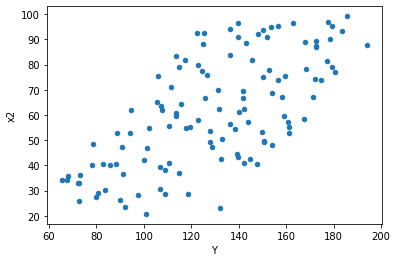

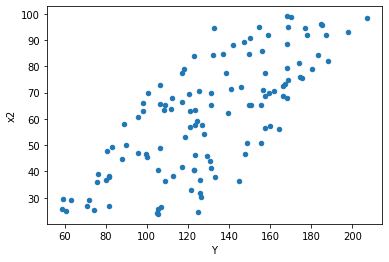

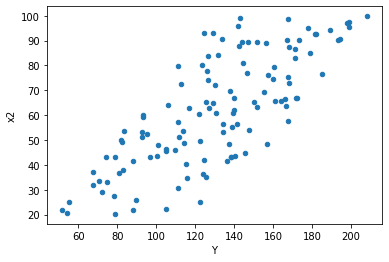

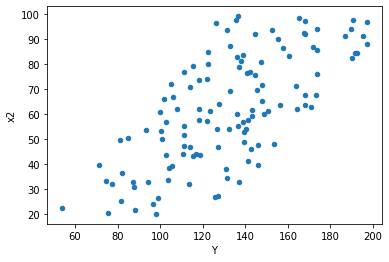

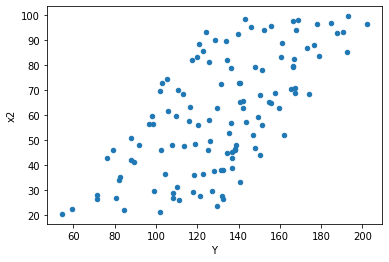

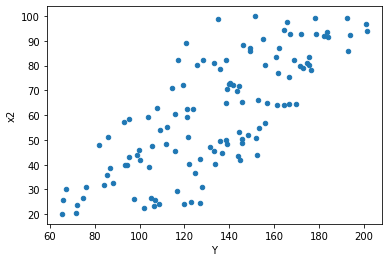

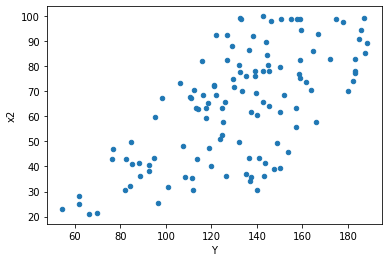

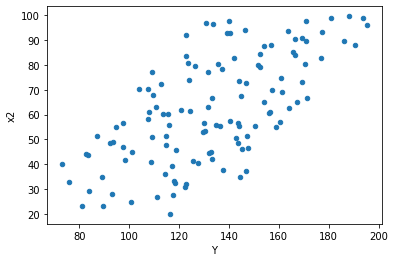

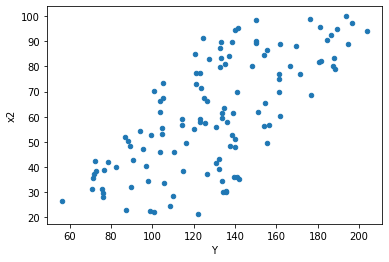

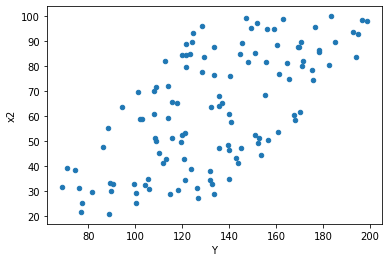

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,62.0,54.0,29.516861468934433,32.62298142308137,0.47607841078926505,0.6041292856126179,1.2689701358460346,0.37269499532253847,0.8136525023387308,0.18634749766126923,Reject001=1 : Homoscedasticity
1.0,48.0,68.0,16.716776753327306,33.64500660051465,0.34826618236098555,0.4947795088310978,1.4206935209065115,0.18131987963152318,0.9093400601842384,0.09065993981576159,Reject001=1 : Homoscedasticity
3.0,63.0,53.0,29.973319517733934,25.922944387958,0.4757669764719672,0.4891121582633585,1.0280498278597476,0.9228390861201621,0.538580456939919,0.46141954306008104,Reject001=1 : Homoscedasticity
4.0,63.0,53.0,26.345106916866612,26.995994717867077,0.418176300267724,0.5093583909031524,1.2180470069132372,0.46246677050536045,0.7687666147473198,0.23123338525268022,Reject001=1 : Homoscedasticity
5.0,52.0,64.0,26.61197640637257,36.95716142721609,0.5117687770456263,0.5774556473002515,1.128352633456513,0.6416945380144454,0.6791527309927773,0.3208472690072227,Reject001=1 : Homoscedasticity
8.0,63.0,53.0,28.680956566773922,30.072033660910485,0.4552532788376813,0.567396861526613,1.2463322899623004,0.41178362553233994,0.79410818723383,0.20589181276616997,Reject001=1 : Homoscedasticity
9.0,53.0,63.0,25.91968080661581,31.569309659144714,0.48905058125690204,0.5011001533197573,1.0246387030803374,0.9206892723005471,0.5396553638497265,0.46034463615027355,Reject001=1 : Homoscedasticity
10.0,58.0,58.0,20.8656522363589,22.1093864152343,0.3597526247648086,0.38119631750403965,1.0596067721625382,0.8262566427071243,0.5868716786464379,0.41312832135356214,Reject001=1 : Homoscedasticity
13.0,60.0,56.0,26.652553929600508,25.779265603474926,0.44420923216000846,0.46034402863348084,1.0363225149441748,0.8948774866929132,0.5525612566535434,0.4474387433464566,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,62.0,54.0,29.516861468934433,32.62298142308137,0.47607841078926505,0.6041292856126179,1.2689701358460346,0.37269499532253847,Reject001=1 : Homoscedasticity
1.0,48.0,68.0,16.716776753327306,33.64500660051465,0.34826618236098555,0.4947795088310978,1.4206935209065115,0.18131987963152318,Reject001=1 : Homoscedasticity
2.0,61.0,55.0,34.78819950594965,26.646812515910057,0.5702983525565516,0.48448750028927373,0.8495334032044767,0.5336031372526592,Reject001=1 : Homoscedasticity
3.0,63.0,53.0,29.973319517733934,25.922944387958,0.4757669764719672,0.4891121582633585,1.0280498278597476,0.9228390861201621,Reject001=1 : Homoscedasticity
4.0,63.0,53.0,26.345106916866612,26.995994717867077,0.418176300267724,0.5093583909031524,1.2180470069132372,0.46246677050536045,Reject001=1 : Homoscedasticity
5.0,52.0,64.0,26.61197640637257,36.95716142721609,0.5117687770456263,0.5774556473002515,1.128352633456513,0.6416945380144454,Reject001=1 : Homoscedasticity
6.0,67.0,49.0,38.47636157971819,25.592052686206088,0.5742740534286297,0.52228678951441,0.9094730754352623,0.7113868413113392,Reject001=1 : Homoscedasticity
7.0,61.0,55.0,28.381476270237926,20.10573864477096,0.4652701027907857,0.3655588844503811,0.7856917568046685,0.3583106863145089,Reject001=1 : Homoscedasticity
8.0,63.0,53.0,28.680956566773922,30.072033660910485,0.4552532788376813,0.567396861526613,1.2463322899623004,0.41178362553233994,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64